In [8]:
from matplotlib import pyplot as plt
from matplotlib import colors
from astropy.io import fits
from IPython.display import Image
import math
import numpy as np
from astropy.io import ascii
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
plt.rcParams["figure.figsize"] = (10,7.5)
plt.rcParams.update({'font.size': 20})
label_size = 15
plt.rcParams['xtick.labelsize'] = 15#label_size
plt.rcParams['ytick.labelsize'] =15 #label_size

# 4.1 Bias Frames
## 1 Opening and Plotting the Distribution counts

In [10]:
#Opening 0C bias frames



In [11]:
bias_frames = []
for i in range(10):
    filename = f'bias_0C_visible_.0000000{i}.BIAS.FIT'
    bias = f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Bias frames at different temperatures/0C/{filename}'
    bias_data = fits.getdata(bias)
    bias_frames.append(bias_data)

In [12]:
#Grabbing the image data from files, creating an array of all the images, and averaging them out

avg= np.mean(bias_frames, axis=0)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Turning the 2d array into 1d list

avgcountvalues= avg.flatten()

In [15]:
mean=np.mean(avg)
std=np.std(avg)

<function matplotlib.pyplot.show(close=None, block=None)>

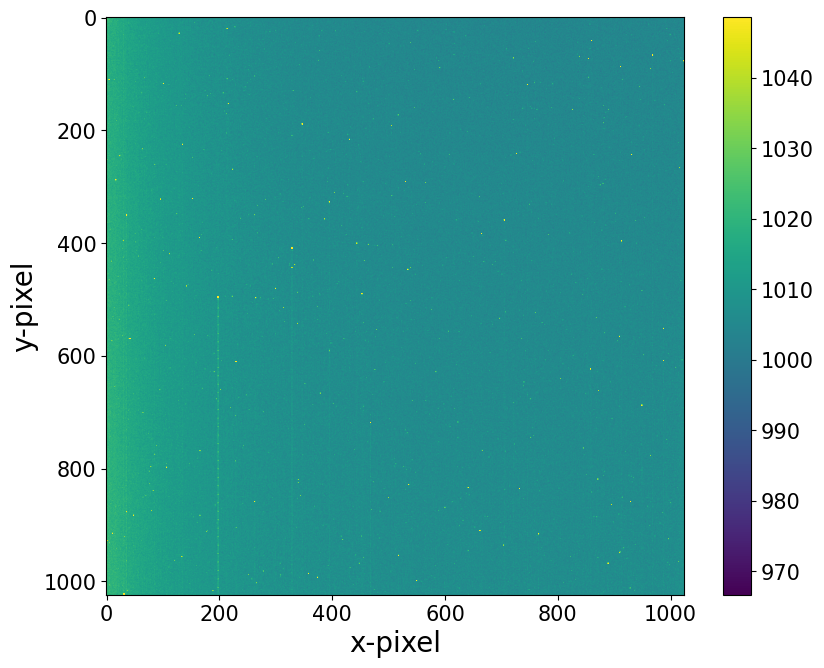

In [16]:
plt.imshow(avg, vmin=mean-3*std, vmax=mean+3*std)
plt.colorbar()
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show

Text(0.5, 0, 'Counts')

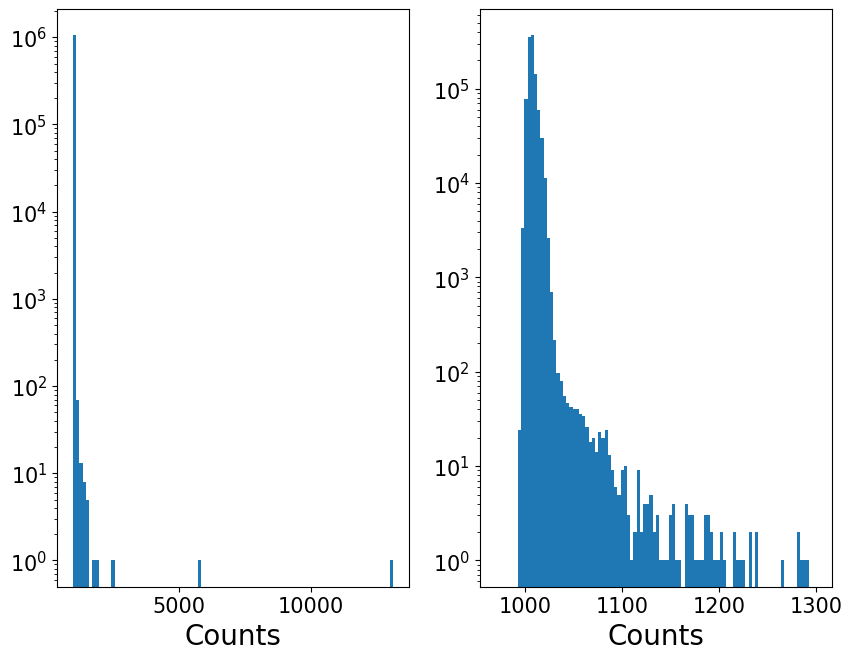

In [17]:
fig, (axes1, axes2)= plt.subplots(nrows=1, ncols=2)

axes1.hist(avgcountvalues, bins=100)
axes1.set_yscale('log')
axes1.set_xlabel('Counts')
axes2.hist(avgcountvalues, range=[970,1300], bins=100)
axes2.set_yscale('log')
plt.xlabel('Counts')

In [18]:
#Creating a cut

cutavgcount= avgcountvalues[avgcountvalues<1110]

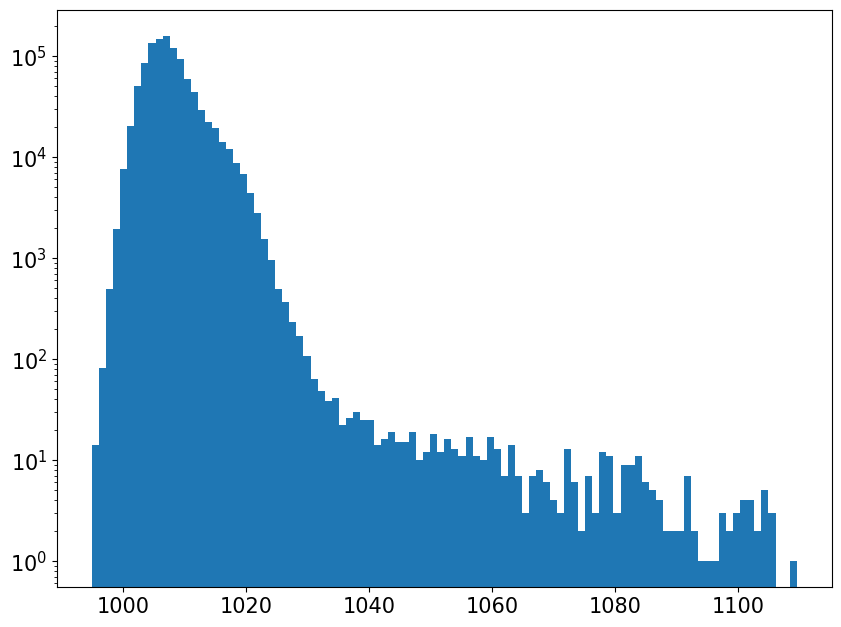

In [19]:
#histogram with the new set

plt.hist(cutavgcount, bins=100)
plt.yscale('log')

In [20]:
#Mean, median, mode, and standard deviation of average count

print(np.mean(avgcountvalues))
print(stats.mode(avgcountvalues)[0])
print(np.median(avgcountvalues))
print(np.std(avgcountvalues))

1007.6364462852486
1006.5
1006.9
13.660944685337988


In [21]:
#Mean, median, mode, and standard deviation of cut average count

print(np.mean(cutavgcount))
print(stats.mode(cutavgcount)[0])
print(np.median(cutavgcount))
print(np.std(cutavgcount))

1007.5976102297732
1006.5
1006.9
4.1884752860684635


In [22]:
print(len(avgcountvalues))
print(len(cutavgcount))

1048576
1048469


## 2. calculating and overplotting a normal distribution with the mean and standard deviation

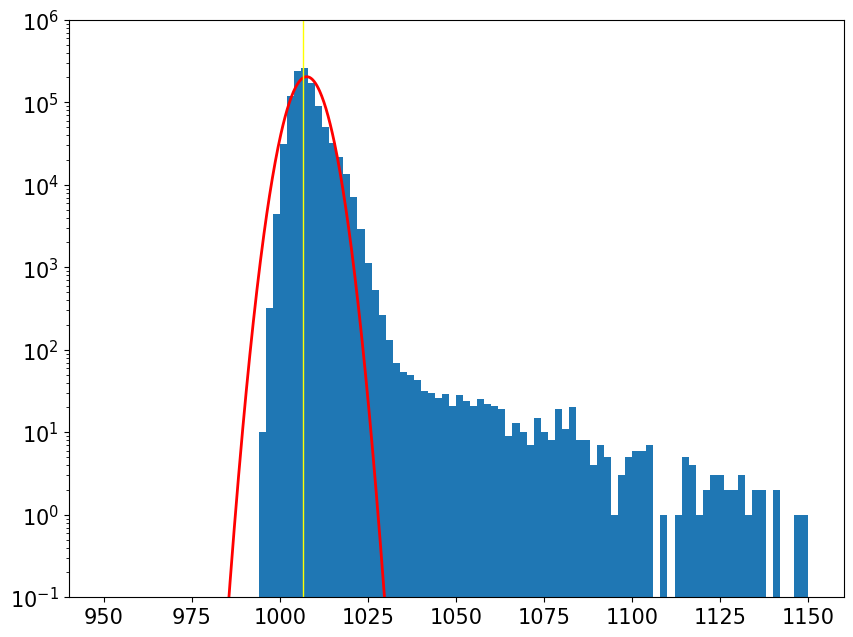

In [23]:
cmin=950
cmax=1150
nbins=100
normalization= (cmax-cmin)/nbins*len(avgcountvalues[(avgcountvalues>=cmin) & (avgcountvalues<=cmax)])

cutmin=cmin
cutmax=1075

cutcounts=avgcountvalues[(avgcountvalues>=cutmin) & (avgcountvalues<=cutmax)]

mu=np.mean(cutcounts)
sig=np.std(cutcounts)
mode=stats.mode(cutcounts)[0]

xarray=np.linspace(cmin, cmax, nbins*10)
yarray=normalization*norm.pdf(xarray, loc=mu, scale=sig)

plt.hist(avgcountvalues, range=[cmin, cmax], bins=nbins)
plt.yscale('log')
plt.ylim(0.1, 1e6)
plt.plot(xarray, yarray, color='red', linewidth=2.0)
plt.axvline(x=mode, linewidth=1.0, color='yellow')

In [24]:
dir(norm)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_argcheck',
 '_argcheck_rvs',
 '_attach_argparser_methods',
 '_attach_methods',
 '_cdf',
 '_cdf_single',
 '_cdfvec',
 '_construct_argparser',
 '_construct_default_doc',
 '_construct_doc',
 '_ctor_param',
 '_delta_cdf',
 '_entropy',
 '_fit_loc_scale_support',
 '_fitstart',
 '_get_support',
 '_isf',
 '_logcdf',
 '_logpdf',
 '_logpxf',
 '_logsf',
 '_mom0_sc',
 '_mom1_sc',
 '_mom_integ0',
 '_mom_integ1',
 '_moment_error',
 '_munp',
 '_nlff_and_penalty',
 '_nnlf',
 '_nnlf_and_penalty',
 '_open_support_mask',
 '_param_info',
 '_parse_arg_template',
 '_parse_args',
 '_parse_args_rv

In [25]:
#Writing the combined average counts into a new fits file
#newhdu= fits.PrimaryHDU(avg)
#newhdu.writeto('avg_bias_frames.fits')

# 4.2 Dark Frames
## 4.2.1. Combining series of 10 dark frames.

In [26]:
dark_0c30_frames = []
for i in range(10):
    dfilename = f'dark_0C_30s_visible_.0000000{i}.DARK.FIT'
    dframe = f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/{dfilename}'
    dframe_data = fits.open(dframe)
    dark_0c30_frames.append(dframe_data[0].data)

In [27]:
masterd_0c30_f= np.mean(dark_0c30_frames, axis=0)

In [28]:
meandf=np.mean(masterd_0c30_f)
stddf=np.std(masterd_0c30_f)
print(meandf-stddf)
print(meandf+stddf)

873.5625372935551
1200.945565695641


<function matplotlib.pyplot.show(close=None, block=None)>

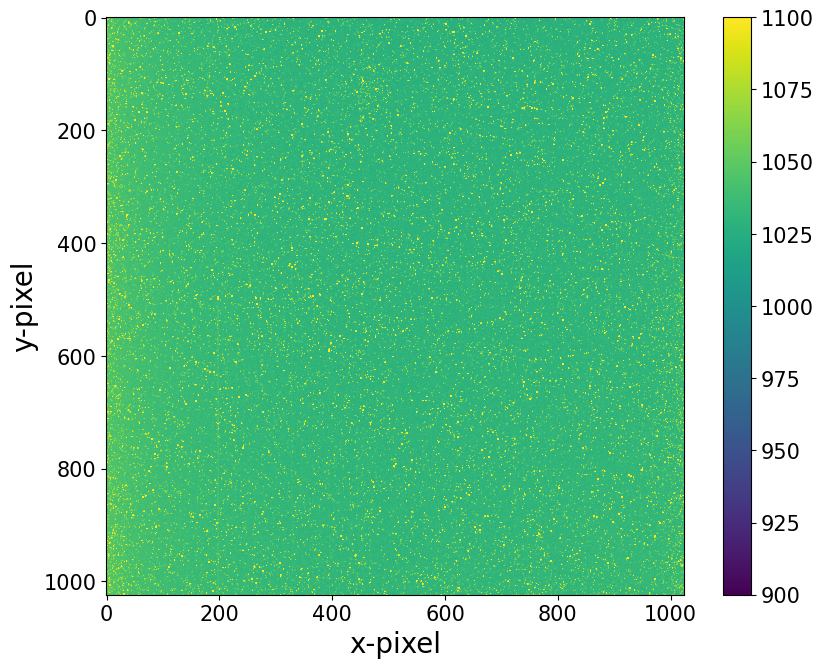

In [29]:
plt.imshow(masterd_0c30_f, vmin=900, vmax=1100)
plt.colorbar()
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

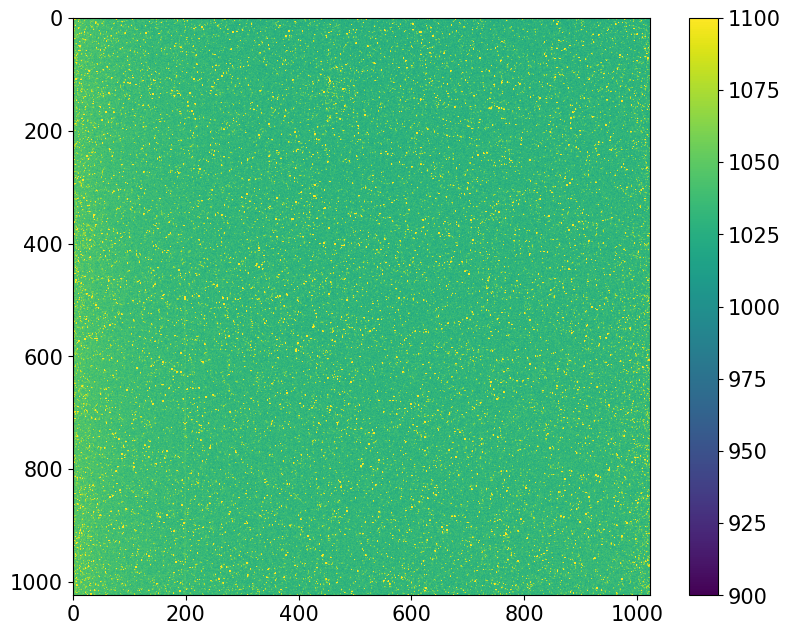

In [30]:
plt.imshow(dark_0c30_frames[1], vmin=900, vmax=1100)
plt.colorbar()
plt.show

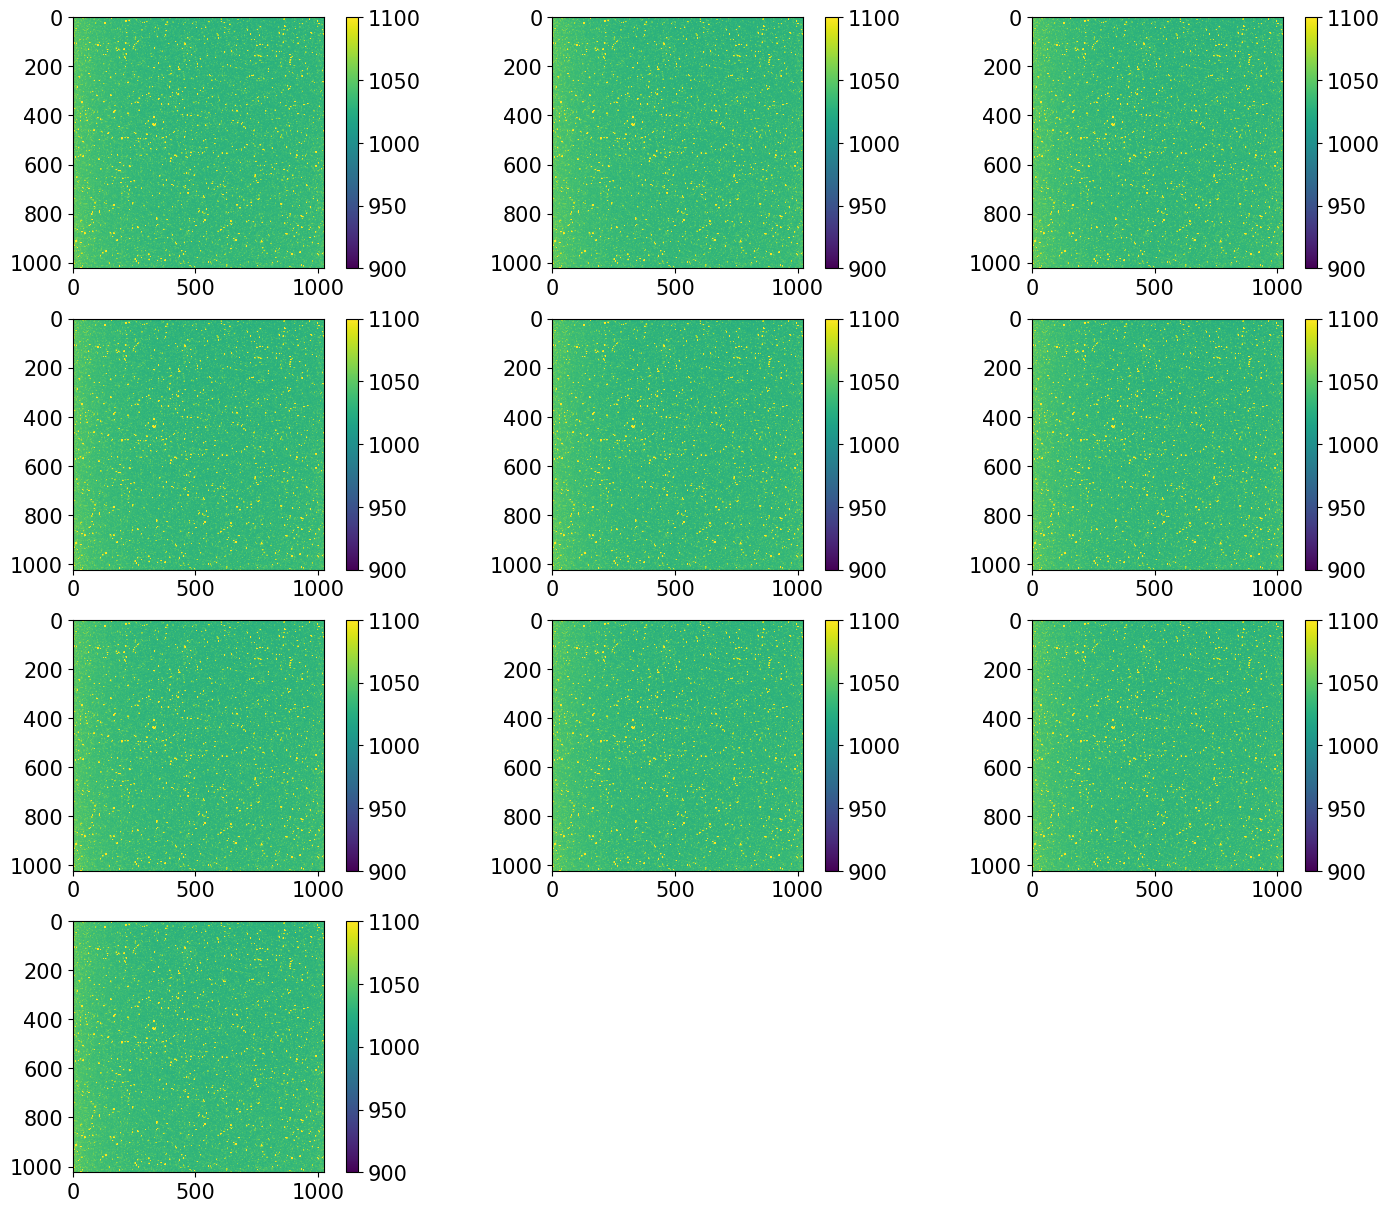

In [31]:
fig = plt.figure(figsize=(18, 15))  # width, height in inches
plt.subplots_adjust(wspace=.1, hspace=.2)
for i in range(10):
    sub = fig.add_subplot(4, 3, i+1)
    cb=sub.imshow(dark_0c30_frames[i], vmin=900, vmax=1100)
    fig.colorbar(cb, orientation='vertical', fraction=.33)

In [32]:
copy_masterd_0c30_f=np.zeros((1024,1024))
np.copyto(copy_masterd_0c30_f, masterd_0c30_f)

In [33]:
copy_masterd_0c30_f[copy_masterd_0c30_f > 2000] = np.median(masterd_0c30_f)

In [34]:
cut_meandf=np.mean(copy_masterd_0c30_f)
cut_stddf=np.std(copy_masterd_0c30_f)

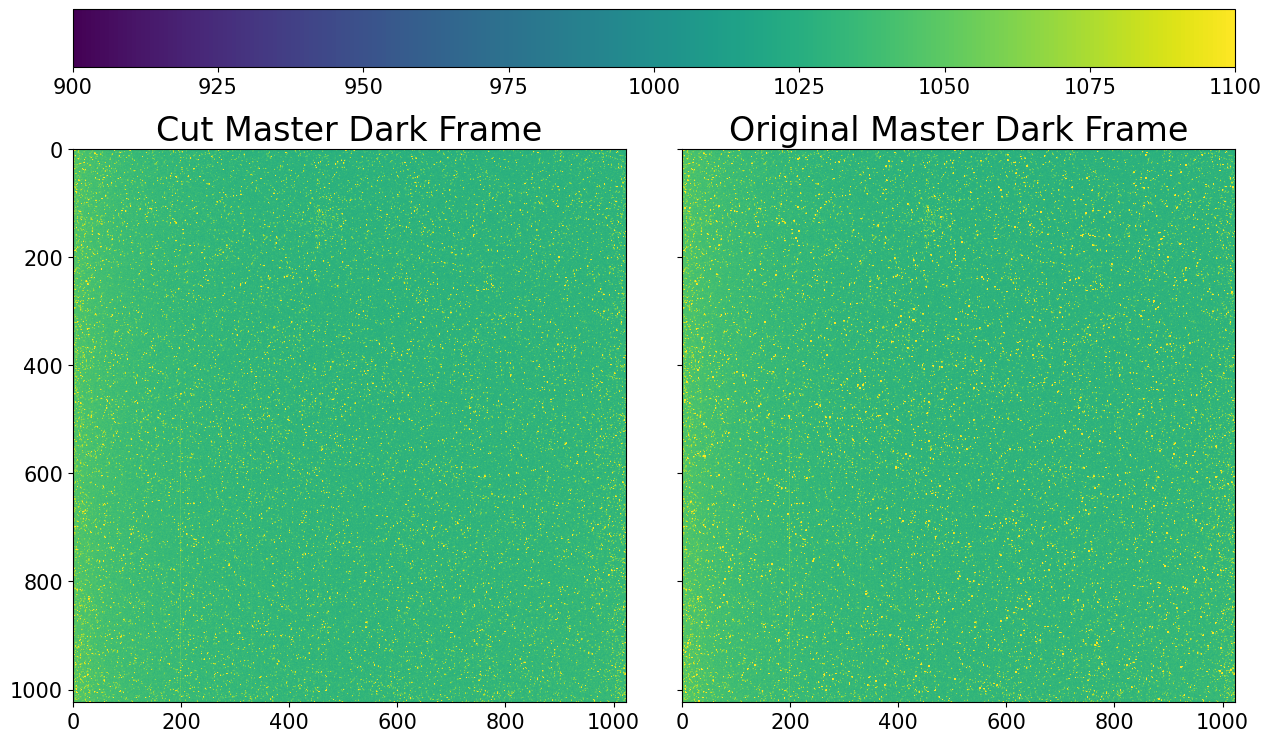

In [35]:
import matplotlib.pyplot as plt
from matplotlib import colors # import the colors object from matplotlib

figs, axs= plt.subplots (1, 2, figsize=(15,12), sharex=True, sharey=True)


norm = colors.Normalize(vmin=900, vmax=1100)

cb=axs[0].imshow(copy_masterd_0c30_f,norm=norm)
axs[0].set_title('Cut Master Dark Frame')
#plt.colorbar(cb, ax=axs[0,0])
axs[1].imshow(masterd_0c30_f,vmin=900, vmax=1100)
axs[1].set_title('Original Master Dark Frame')

fig.colorbar(cb, ax=axs, orientation='horizontal', fraction=.75)

figs.subplots_adjust(wspace=0.1, hspace=0.1)

## Each frame is very similar looking but there are slight differences in their warmth. It could be from the fact that the temperature slightly fluctuated around 0C, so those slight temperature changes could have created very faint warmer or colder pixels.

## 4.2.2 Measuring the mean and the standard deviation of the cut dark frames.

In [36]:
d10hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_10s_visible_.00000000.DARK.FIT')
d20hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_20s_visible_.00000000.DARK.FIT')
d30hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_30s_visible_.00000000.DARK.FIT')
d40hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_40s_visible_.00000000.DARK.FIT')
d50hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_50s_visible_.00000000.DARK.FIT')
d60hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_60s_visible_.00000000.DARK.FIT')
d90hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_90s_visible_.00000000.DARK.FIT')
d120hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_120s_visible_.00000000.DARK.FIT')
d10c120hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_10C_120s_visible_.00000000.DARK.FIT')


In [37]:
allsec_0c_dframes = []
for i in range(6):
    dffilename = f'dark_0C_{i}0s_visible_.00000000.DARK.FIT'
    allsec_dframe = f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/{dfilename}'
    allsec_dframe_data = fits.open(allsec_dframe)
    dark_0c30_frames.append(dframe_data[0].data)

In [38]:
df10_data = d10hdu[0].data
df20_data = d20hdu[0].data
df30_data = d30hdu[0].data
df40_data = d40hdu[0].data
df50_data = d50hdu[0].data
df60_data = d60hdu[0].data
df90_data = d90hdu[0].data
df120_data = d120hdu[0].data
df10c120_data = d10c120hdu[0].data


allsec_df= [df10_data, df20_data, df30_data, df40_data, df50_data, df60_data, df90_data, df120_data, df10c120_data]

allsec_dfplot=[df10_data, df20_data, df30_data, df40_data, df50_data, df60_data, df90_data, df120_data]


In [39]:
##Flattening the 10 dark frames at 30 second exposure

flat_df1=df10_data.flatten() # Changed df_data0 to df10_data
flat_df2=df20_data.flatten() # Changed df_data1 to df20_data
flat_df3=df30_data.flatten() # Changed df_data2 to df30_data
flat_df4=df40_data.flatten() # Changed df_data3 to df40_data
flat_df5=df50_data.flatten() # Changed df_data4 to df50_data
flat_df6=df60_data.flatten() # Changed df_data5 to df60_data
flat_df7=df90_data.flatten() # Changed df_data6 to df90_data
flat_df8=df120_data.flatten() # Changed df_data7 to df120_data
flat_df9=df10c120_data.flatten() # Changed df_data8 to df10c120_data
#flat_df9=df_data9.flatten() # Removed since there doesn't seem to be a corresponding df_data9 variable

In [40]:
##Flattening the dark frames at different exposures

flat_df10=df10_data.flatten()
flat_df20=df20_data.flatten()
flat_df30=df30_data.flatten()
flat_df40=df40_data.flatten()
flat_df50=df50_data.flatten()
flat_df60=df60_data.flatten()
flat_df90=df90_data.flatten()
flat_df120=df120_data.flatten()
flat_df10c120=df10c120_data.flatten()

allsec_flatdf= [flat_df10, flat_df20, flat_df30, flat_df40, flat_df50, flat_df60, flat_df90, flat_df120, flat_df10c120]


In [41]:
##Histogram of one dark frame at 30 second exposure

plt.hist(flat_df0, bins=100)
plt.yscale('log')

NameError: name 'flat_df0' is not defined

In [ ]:
##Histogram of each dark frame at different exposures

n_bins=100
fig, axs = plt.subplots(3, 3, figsize=(18,15), sharey=True)

axs[0,0].hist(flat_df10, bins=n_bins)
axs[0,0].set_yscale('log')
axs[0,0].set_title('10 second exposure')
axs[0,1].hist(flat_df20, bins=n_bins)
axs[0,1].set_title('20 second exposure')
axs[0,2].hist(flat_df30, bins=n_bins)
axs[0,2].set_title('30 second exposure')
axs[1,0].hist(flat_df40, bins=n_bins)
axs[1,0].set_title('40 second exposure')
axs[1,1].hist(flat_df50, bins=n_bins)
axs[1,1].set_title('50 second exposure')
axs[1,2].hist(flat_df60, bins=n_bins)
axs[1,2].set_title('60 second exposure')
axs[2,0].hist(flat_df90, bins=n_bins)
axs[2,0].set_title('90 second exposure')
axs[2,1].hist(flat_df120, bins=n_bins)
axs[2,1].set_title('120 second exposure')
axs[2,2].hist(flat_df10c120, bins=n_bins)
axs[2,2].set_title('120 second exposure at 10C')
plt.show()

In [ ]:
#Making a cut on all dark frames

cut_df10=flat_df10[flat_df10<7000]
cut_df20=flat_df20[flat_df20<7000]
cut_df30=flat_df30[flat_df30<7000]
cut_df40=flat_df40[flat_df40<7000]
cut_df50=flat_df50[flat_df50<7000]
cut_df60=flat_df60[flat_df60<7000]
cut_df90=flat_df90[flat_df90<7000]
cut_df120=flat_df120[flat_df120<7000]
cut_df10c120=flat_df10c120[flat_df10c120<7000]


cut2_df10=flat_df10[flat_df10<2000]
cut2_df20=flat_df20[flat_df20<2000]
cut2_df30=flat_df30[flat_df30<2000]
cut2_df40=flat_df40[flat_df40<2000]
cut2_df50=flat_df50[flat_df50<2000]
cut2_df60=flat_df60[flat_df60<2000]
cut2_df90=flat_df90[flat_df90<2000]
cut2_df120=flat_df120[flat_df120<2000]
cut2_df10c120=flat_df10c120[flat_df10c120<2000]

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18,15), sharey=True)

axs[0,0].hist(cut_df10, bins=n_bins)
axs[0,0].set_yscale('log')
axs[0,0].set_title('10 second exposure')
axs[0,1].hist(cut_df20, bins=n_bins)
axs[0,1].set_title('20 second exposure')
axs[0,2].hist(cut_df30, bins=n_bins)
axs[0,2].set_title('30 second exposure')
axs[1,0].hist(cut_df40, bins=n_bins)
axs[1,0].set_title('40 second exposure')
axs[1,1].hist(cut_df50, bins=n_bins)
axs[1,1].set_title('50 second exposure')
axs[1,2].hist(cut_df60, bins=n_bins)
axs[1,2].set_title('60 second exposure')
axs[2,0].hist(cut_df90, bins=n_bins)
axs[2,0].set_title('90 second exposure')
axs[2,1].hist(cut_df120, bins=n_bins)
axs[2,1].set_title('120 second exposure')
axs[2,2].hist(cut_df10c120, bins=n_bins)
axs[2,2].set_title('120 second exposure at 10C')
plt.show()

In [ ]:
allsec_cutdf=[cut_df10, cut_df20, cut_df30, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120,cut_df10c120]
err_allsec_cutdf=[cut_df10, cut_df20, cut_df30, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120]
allsec_cutdfplot=[cut_df10, cut_df20, cut_df30, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120]
allsec_cut2df=[cut2_df10, cut2_df20, cut2_df30, cut2_df40,cut2_df50, cut2_df60, cut2_df90, cut2_df120,cut2_df10c120]

In [ ]:
for i in range(len(allsec_cutdf)):
    print(np.mean(allsec_cutdf[i]))
    print(np.std(allsec_cutdf[i]))
    print(np.median(allsec_cutdf[i]))

## a

In [ ]:
allsec_cutdfmean=[]
for i in range(len(allsec_cutdfplot)):
    allsec_cutdfmean.append(np.mean(allsec_cutdfplot[i]))
    print(allsec_cutdfmean)


In [ ]:
allsec_dfmean=[]
for i in range(len(allsec_dfplot)):
    allsec_dfmean.append(np.mean(allsec_dfplot[i]))
    print(allsec_dfmean)

In [ ]:
y_err=[]
for i in range(len(err_allsec_cutdf)):
    y_err.append(np.std(err_allsec_cutdf[i]))
    print(np.std(err_allsec_cutdf[i]))
    print(y_err)

In [ ]:
y2_err=[]
for i in range(len(err_allsec_cutdf)):
    y2_err.append(np.sqrt(np.mean(err_allsec_cutdf[i]))/np.sqrt(len(err_allsec_cutdf[i])))
    print(np.std(err_allsec_cutdf[i]))
    print(y2_err)

In [ ]:

for i in range(len(all_cutdf)):
    print(np.sqrt(np.mean(all_cutdf[i]))/np.sqrt(len(all_cutdf[i])))


In [ ]:

for i in range(len(allsec_flatdf)):
    print(np.sqrt(np.mean(allsec_flatdf[i]))/np.sqrt(len(allsec_flatdf[i])))

## b

In [ ]:
for i in range(len(allsec_cutdf)):
    print(np.sqrt(np.mean(allsec_cutdf[i]))/np.sqrt(len(allsec_cutdf[i])))

In [ ]:
for i in range(len(allsec_cut2df)):
    print(np.sqrt(np.mean(allsec_cut2df[i]))/np.sqrt(len(allsec_cut2df[i])))

In [ ]:
time_array=[10,20,30,40,50,60,90,120]

In [ ]:
allsec_cutdf[3]

In [ ]:
np.mean(df10_data)

In [ ]:
y_err

In [ ]:
m, b = np.polyfit(time_array, allsec_cutdfmean, deg=1)
n, c = np.polyfit(time_array, allsec_dfmean, deg=1)
regression=[]
residual=[]
for i in range(len(time_array)):
    regression.append(0.9*time_array[i]+1010)
    residual.append(allsec_cutdfmean[0]-regression)
residual

In [ ]:
plt.scatter(time_array, allsec_cutdfmean)
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.errorbar(time_array, allsec_cutdfmean, yerr=y_err, fmt='o', capsize=5)
plt.xlabel('Exposure time (s)')
plt.ylabel('Mean Counts')
plt.legend(loc="best")
plt.xlim(-1,130)

In [ ]:
plt.scatter(time_array, allsec_dfmean)
plt.axline(xy1=(0, c), slope=n, label=f'$y = {n:.1f}x {c:+.1f}$')
#plt.errorbar(time_array, allsec_cutdfmean, yerr=y2_err, fmt='o', capsize=5)
plt.xlabel('Exposure time (s)')
plt.ylabel('Mean Counts')
plt.legend(loc="best")
plt.xlim(-1,130)

In [ ]:
masterdf[67,968]

In [ ]:
cut_masterdf[67,968]

In [ ]:
print(np.max(masterdf))
print(np.max(cut_masterdf))
print(np.std(masterdf))
print(np.std(cut_masterdf))

#4.3. Imaging flat-fields

4.3 1.

In [42]:
flat2s_0= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_2s_visible_.00000000.FLAT.FIT')
flat30_1= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000001.FLAT.FIT')
flat30_2= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000002.FLAT.FIT')
flat30_3= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000003.FLAT.FIT')
flat30_4= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000004.FLAT.FIT')
flat30_5= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000005.FLAT.FIT')
flat30_6= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000006.FLAT.FIT')
flat30_7= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000007.FLAT.FIT')
flat30_8= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000008.FLAT.FIT')
flat30_9= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000009.FLAT.FIT')

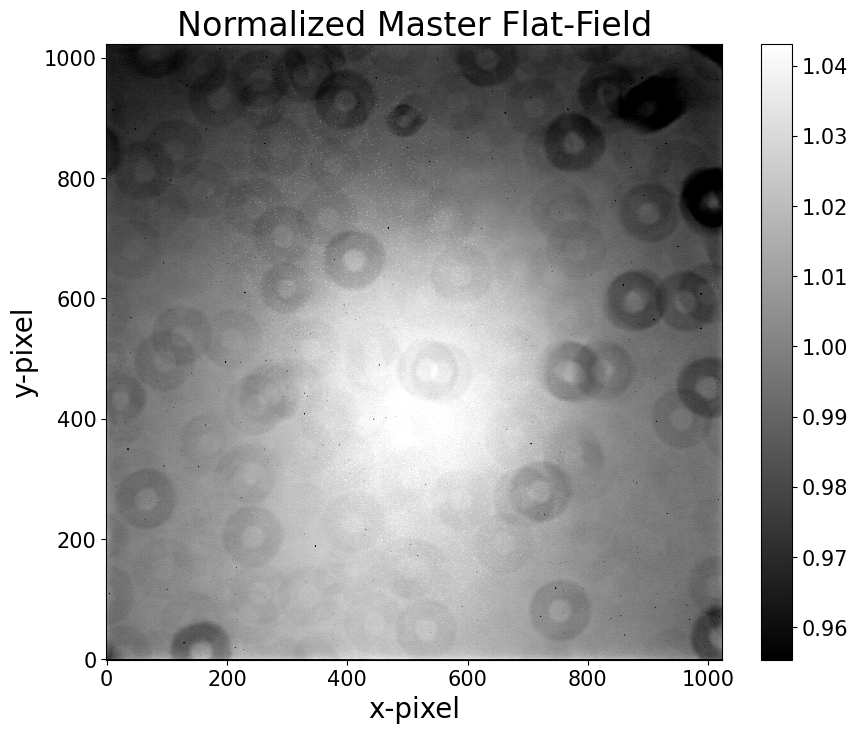

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from google.colab import drive

# Function to open and extract data from FITS files
def get_fits_data(filenames):
    data = []
    for filename in filenames:
        with fits.open(filename) as hdul:
            data.append(hdul[0].data)
    return np.array(data)

# List of flat-field files
flat_files = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_2s_visible_.00000000.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000001.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000002.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000003.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000004.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000005.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000006.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000007.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000008.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000009.FLAT.FIT'
]

# Load flat-field data
flat_data = get_fits_data(flat_files)

# Compute the median flat field
master_flat = np.median(flat_data, axis=0)

# Load dark frames
dark_files = [f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_30s_visible_.0000000{i}.DARK.FIT' for i in range(10)]
dark_data = get_fits_data(dark_files)

# Compute the Master Dark
master_dark = np.median(dark_data, axis=0)

# Subtract Master Dark from Master Flat
final_frame = master_flat - master_dark

# Normalize the resulting frame
# Normalization using mean of non-zero pixels
non_zero_pixels = final_frame[final_frame > 0]
normalization_factor = np.mean(non_zero_pixels)
normalized_master_flat = final_frame / normalization_factor

# Plot the normalized master flat-field
plt.figure(figsize=(10, 8))
plt.imshow(normalized_master_flat, cmap='gray', origin='lower',
           vmin=np.percentile(normalized_master_flat, 1),
           vmax=np.percentile(normalized_master_flat, 99))
plt.colorbar()
plt.title('Normalized Master Flat-Field')
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show()

#4.3 2.
After running the code,the normalized_master_flat.FIT file will be in the Google Drive. Now you can open it with DS9. Light regions tend to get 1.02 to 1.05 and dark regions tend to get 0.94 to 0.97.

#4.3 3.
When a star is placed at the center versus the corner of an image, its observed magnitude can change, stars near the edges may appear dimmer.
The light from the star would be spread out over a larger area on the image sensor, resulting in a lower intensity of light detected at any given pixel. \\
$m_1 - m_2$ = -2.5 $log_{10} (\frac{0.94}{1.04})$ \\
$m_1 - m_2$ = 0.1097 \\
$m_1 - m_2$ $\approx$ 0.11

#4.3 4.
Plot a histogram of the counts in your master flat-field. Can you identify any dead pixels?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


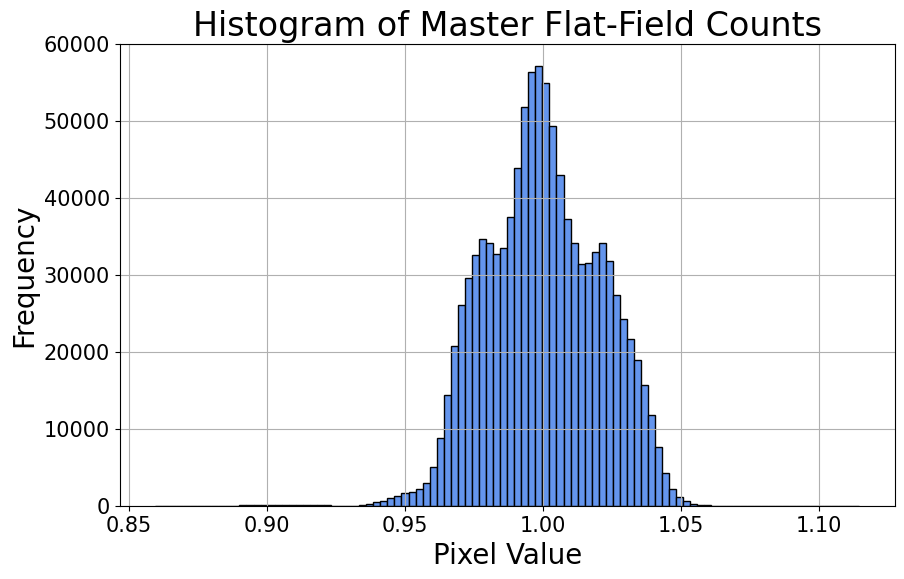

Normalization Factor: 58800.94


In [44]:
# Import necessary libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Function to open and extract data from FITS files
def get_fits_data(filenames):
    data = []
    for filename in filenames:
        with fits.open(filename) as hdul:
            data.append(hdul[0].data)
    return np.array(data)

# Load flat-field data
flat_data = get_fits_data(flat_files)

# Compute the median to reduce noise
master_flat = np.median(flat_data, axis=0)

# Normalize the master flat-field
# Normalization factor: mean of the master flat-field image (non-zero pixels)
non_zero_pixels = master_flat[master_flat > 0]
normalization_factor = np.mean(non_zero_pixels)
normalized_master_flat = master_flat / normalization_factor

# Plot a histogram of the counts in the master flat-field
plt.figure(figsize=(10, 6))
plt.hist(normalized_master_flat.flatten(), bins=100, color='cornflowerblue', edgecolor='black')
plt.title('Histogram of Master Flat-Field Counts')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Output normalization factor for reference
print(f"Normalization Factor: {normalization_factor:.2f}")


#Dead pixels typically have values significantly lower than their neighboring pixels,
#or they may be completely zero or near-zero if there is no signal at all.
#Dead pixels typically appear as spikes at very low pixel values in the histogram,
#indicating that there are many pixels with unusually low counts.

#5. If you forgot to take flat-fields on the night of your observations, can you re-take them later?

Yes, you can retake flat-field images after the night of your observations

#4.4. Spectroscopic calibration

#4.4 1.
Opening the the spectroscopic flat-field, the 50µm slit would be the bottom slit as it is the widest and brightest slit.
Reason being that the 50 µm slit will allow more light through, creating a wider spectrum compared to the narrower 25 µm and 35 µm slits.

#4.4 2.

In [45]:
specflats_0= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000000.FLAT.FIT')
specflats_1= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000001.FLAT.FIT')
specflats_2= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000002.FLAT.FIT')
specflats_3= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000003.FLAT.FIT')
specflats_4= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000004.FLAT.FIT')
specflats_5= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000005.FLAT.FIT')
specflats_6= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000006.FLAT.FIT')
specflats_7= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000007.FLAT.FIT')
specflats_8= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000008.FLAT.FIT')
specflats_9= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000009.FLAT.FIT')

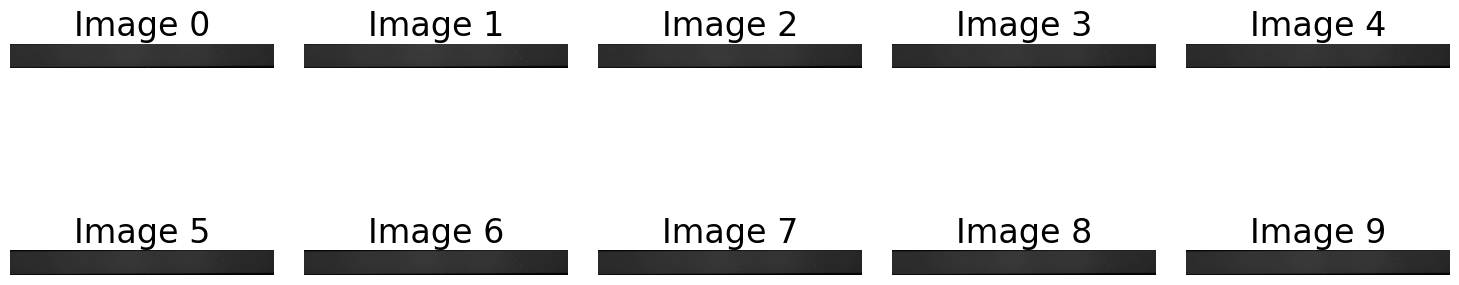

In [57]:
import matplotlib.pyplot as plt
from astropy.io import fits

# List of file paths
spec_flats = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000000.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000001.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000002.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000003.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000004.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000005.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000006.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000007.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000008.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000009.FLAT.FIT'
]

# Define the cropping coordinates
x_min, x_max = 0, 765
y_min, y_max = 30, 102

# Create a subplot grid to display all cropped images
n_files = len(spec_flats)
n_cols = 5
n_rows = (n_files + n_cols - 1) // n_cols  # Compute the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)

# Display each cropped image
for idx, path in enumerate(spec_flats):
    with fits.open(path) as hdul:
        image_data = hdul[0].data

    # Crop the image
    cropped_image = image_data[y_min:y_max, x_min:x_max]

    ax = axes[idx // n_cols, idx % n_cols]
    cax = ax.imshow(cropped_image, cmap='gray', origin='lower')
    ax.set_title(f'Image {idx}')
    ax.axis('off')

# Hide any unused subplots
for j in range(idx + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()

In [65]:
cut_spec_flats = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_00.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_01.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_02.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_03.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_04.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_05.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_06.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_07.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_08.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_09.FIT'
]

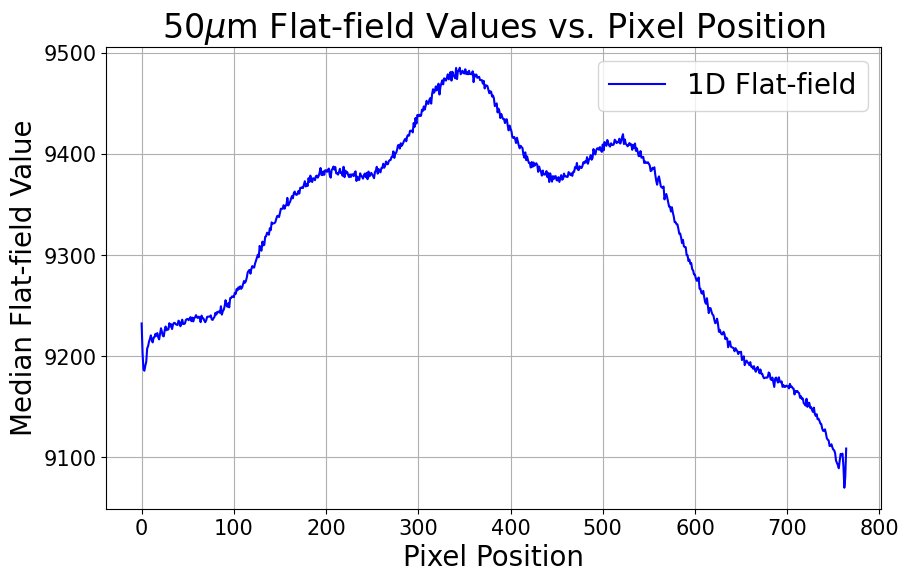

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# List of cropped image file paths
cut_spec_flats = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_00.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_01.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_02.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_03.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_04.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_05.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_06.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_07.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_08.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_09.FIT'
]

# Read in the FITS files and extract image data
data_list = []
for path in cut_spec_flats:
    with fits.open(path) as hdul:
        data_list.append(hdul[0].data)

# Convert list to a 3D numpy array
data_cube = np.array(data_list)

# Collapse the 3D data to 2D by taking the median across the first axis
flat_field_2d = np.median(data_cube, axis=0)

# Collapse the 2D flat-field data to 1D by taking the median of each column
median_flat_field = np.median(flat_field_2d, axis=0)

# Create an array of pixel positions (assuming the first dimension is along the dispersion axis)
pixel_positions = np.arange(len(median_flat_field))

# Plot the 1D flat-field values
plt.figure(figsize=(10, 6))
plt.plot(pixel_positions, median_flat_field, label='1D Flat-field', color='blue')
plt.xlabel('Pixel Position')
plt.ylabel('Median Flat-field Value')
plt.title('50$\mu$m Flat-field Values vs. Pixel Position')
plt.legend()
plt.grid(True)
plt.show()

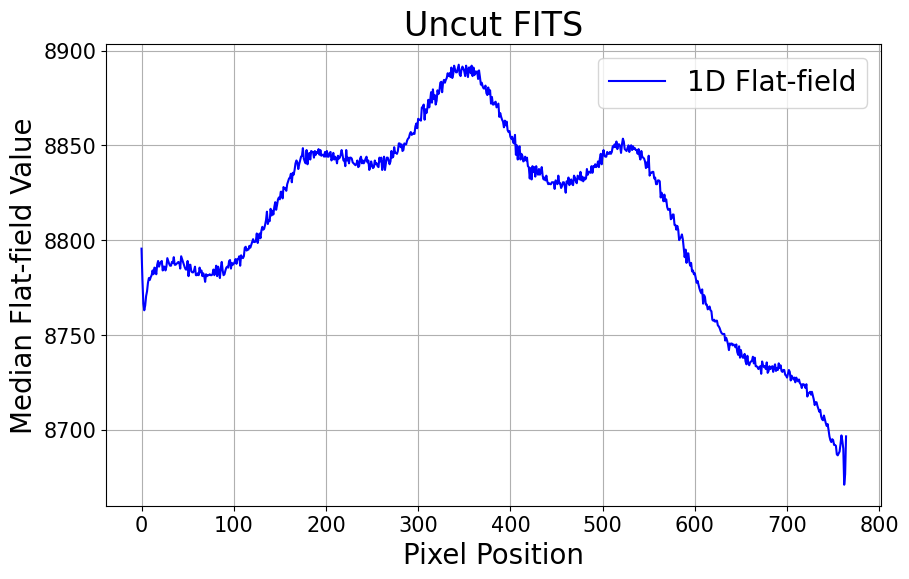

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the FITS files
spec_flats = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000000.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000001.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000002.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000003.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000004.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000005.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000006.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000007.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000008.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000009.FLAT.FIT'
]

# Read in the FITS files and extract image data
data_list = []
for path in spec_flats:
    with fits.open(path) as hdul:
        data_list.append(hdul[0].data)

# Convert list to a 3D numpy array
data_cube = np.array(data_list)

# Collapse the 3D data to 2D by taking the median across the first axis
flat_field_1d = np.median(data_cube, axis=0)

# Collapse the 2D flat-field data to 1D by taking the median of each column
median_flat_field = np.median(flat_field_1d, axis=0)

# Create an array of pixel positions (assuming the first dimension is along the dispersion axis)
pixel_positions = np.arange(len(median_flat_field))

# Plot the 1D flat-field values
plt.figure(figsize=(10, 6))
plt.plot(pixel_positions, median_flat_field, label='1D Flat-field', color='blue')
plt.xlabel('Pixel Position')
plt.ylabel('Median Flat-field Value')
plt.title('Uncut FITS')
plt.legend()
plt.grid(True)
plt.show()


#4.4 3.

Normalized flat-field saved to /content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/normalized_spec_flat_field.FIT


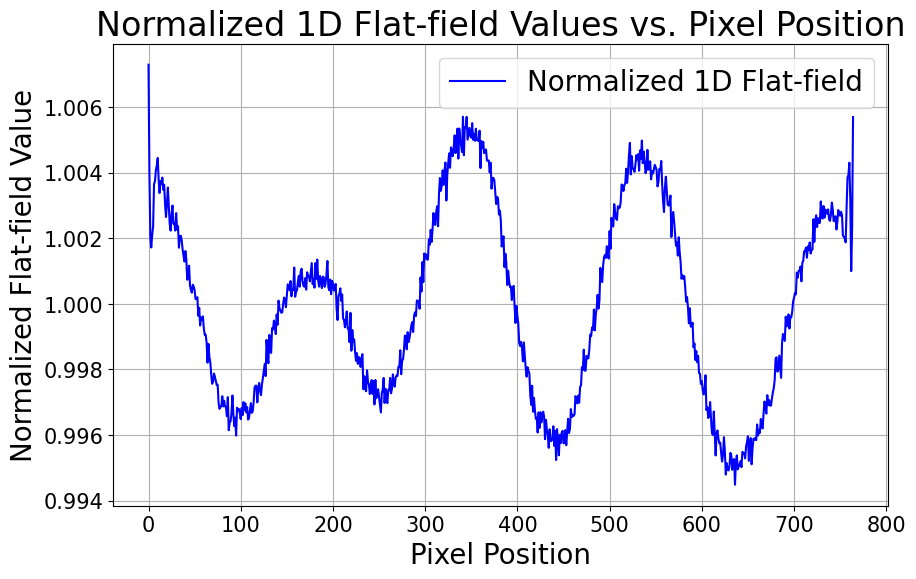

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
import os

# Define a polynomial function for fitting
def poly_fit(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Read in the FITS files and extract image data
data_list = []
for path in cut_spec_flats:
    with fits.open(path) as hdul:
        data_list.append(hdul[0].data)

# Convert list to a 3D numpy array
data_cube = np.array(data_list)

# Collapse the 3D data to 2D by taking the median across the first axis
flat_field_2d = np.median(data_cube, axis=0)

# Collapse the 2D flat-field data to 1D by taking the median of each column
median_flat_field = np.median(flat_field_2d, axis=0)

# Create an array of pixel positions (assuming the first dimension is along the dispersion axis)
pixel_positions = np.arange(len(median_flat_field))

# Fit a low-order polynomial to the 1D flat-field spectrum
degree = 3  # You can change this degree if needed
coeffs, _ = curve_fit(lambda x, *coeffs: poly_fit(x, *coeffs), pixel_positions, median_flat_field, p0=np.ones(degree + 1))

# Generate the polynomial fit
poly_fit_values = poly_fit(pixel_positions, *coeffs)

# Normalize the 1D flat-field by dividing by the polynomial fit
normalized_flat_field = median_flat_field / poly_fit_values

# Normalize the 2D flat-field image
normalized_flat_field_2d = flat_field_2d / poly_fit_values

# Define the path for saving the normalized flat-field FITS file
normalized_fits_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/normalized_spec_flat_field.FIT'

# Save the normalized 2D flat-field to a FITS file
hdu = fits.PrimaryHDU(normalized_flat_field_2d)
hdul = fits.HDUList([hdu])
hdul.writeto(normalized_fits_path, overwrite=True)

print(f'Normalized flat-field saved to {normalized_fits_path}')


# Plot the normalized 1D flat-field
plt.figure(figsize=(10, 6))
plt.plot(pixel_positions, normalized_flat_field, label='Normalized 1D Flat-field', color='blue')
plt.xlabel('Pixel Position')
plt.ylabel('Normalized Flat-field Value')
plt.title('Normalized 1D Flat-field Values vs. Pixel Position')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
spec_darks = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000000.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000001.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000002.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000003.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000004.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000005.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000006.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000007.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000008.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/dark/spectroscopy_dark_15s_.00000009.DARK.FIT'
]

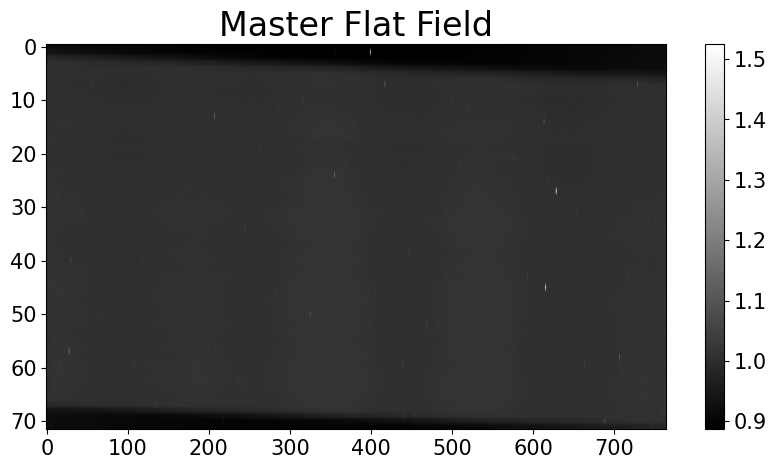

In [105]:
# Define a low-order polynomial function
def poly_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Initialize a list to store normalized flat-fields
normalized_flats = []

for file_path in cut_spec_flats:
    # Read the FITS file
    with fits.open(file_path) as hdul:
        flat_data = hdul[0].data  # Assuming data is in the first HDU

    # Average over the vertical axis to create a 1D spectrum
    flat_1d = np.mean(flat_data, axis=0)

    # Fit a low-order polynomial (e.g., 3rd degree)
    x = np.arange(len(flat_1d))
    popt, _ = curve_fit(poly_func, x, flat_1d, p0=np.ones(4))  # p0 is initial guess for coefficients

    # Create fitted polynomial
    fit_curve = poly_func(x, *popt)

    # Normalize the 2D flat-field
    normalized_flat = flat_data / fit_curve[np.newaxis, :]  # Expand fit_curve to match dimensions of flat_data
    normalized_flats.append(normalized_flat)

# Average the normalized flat-fields to create the master flat field
master_flat_field = np.mean(normalized_flats, axis=0)

# Visualize the master flat field
plt.figure(figsize=(10, 5))
plt.title('Master Flat Field')
plt.imshow(master_flat_field, aspect='auto', cmap='gray')
plt.colorbar()
plt.show()

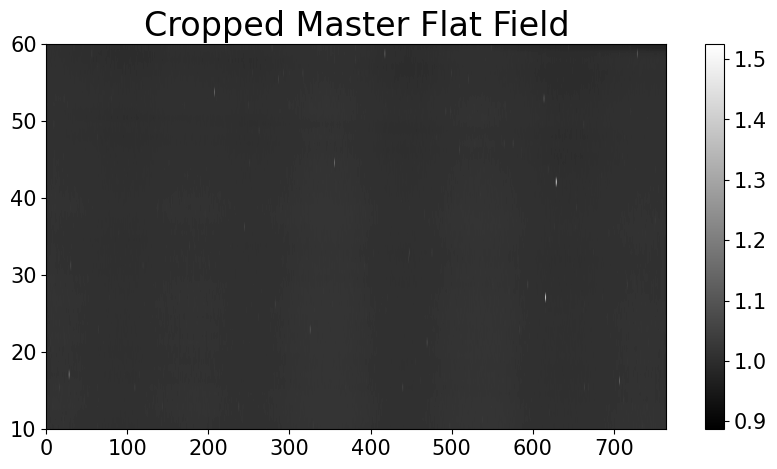

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit

# Define a low-order polynomial function
def poly_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Initialize a list to store normalized flat-fields
normalized_flats = []

for file_path in cut_spec_flats:
    # Read the FITS file
    with fits.open(file_path) as hdul:
        flat_data = hdul[0].data  # Assuming data is in the first HDU

    # Average over the vertical axis to create a 1D spectrum
    flat_1d = np.mean(flat_data, axis=0)

    # Fit a low-order polynomial (e.g., 3rd degree)
    x = np.arange(len(flat_1d))
    popt, _ = curve_fit(poly_func, x, flat_1d, p0=np.ones(4))  # p0 is initial guess for coefficients

    # Create fitted polynomial
    fit_curve = poly_func(x, *popt)

    # Normalize the 2D flat-field
    normalized_flat = flat_data / fit_curve[np.newaxis, :]  # Expand fit_curve to match dimensions of flat_data
    normalized_flats.append(normalized_flat)

# Average the normalized flat-fields to create the master flat field
master_flat_field = np.mean(normalized_flats, axis=0)

# Visualize the master flat field
plt.figure(figsize=(10, 5))
plt.title('Cropped Master Flat Field')
plt.imshow(master_flat_field, aspect='auto', cmap='gray', extent=[0, master_flat_field.shape[1], 5, 65])
plt.colorbar()
plt.xlim(0, master_flat_field.shape[1])  # Adjust x-axis limits if necessary
plt.ylim(10, 60)  # Set y-axis limits to focus on the grey region

# Adjust the aspect ratio to ensure the region is shown more prominently
plt.gca().set_aspect('auto', adjustable='box')

plt.show()

#4.3 4.

In [69]:
speclight_0= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000000.FIT')
speclight_1= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000001.FIT')
speclight_2= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000002.FIT')
speclight_3= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000003.FIT')
speclight_4= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000004.FIT')
speclight_5= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000005.FIT')
speclight_6= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000006.FIT')
speclight_7= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000007.FIT')
speclight_8= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000008.FIT')
speclight_9= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000009.FIT')

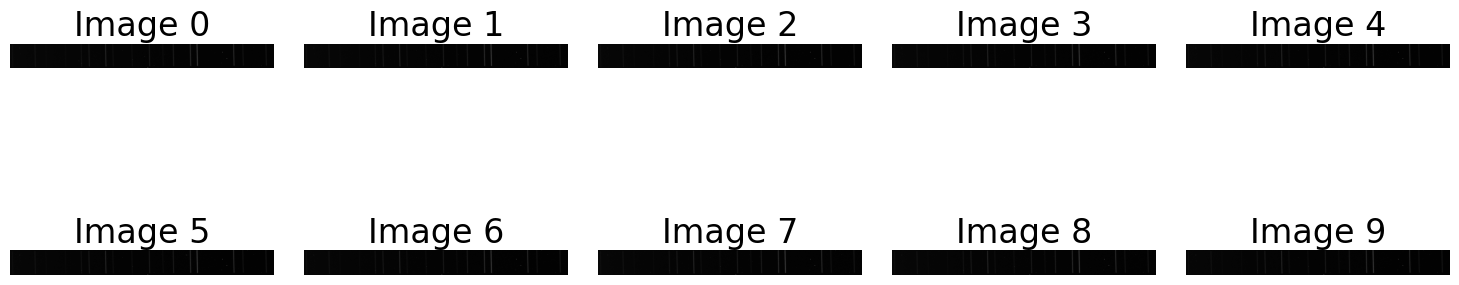

In [117]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# List of file paths
spec_light = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000000.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000001.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000002.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000003.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000004.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000005.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000006.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000007.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000008.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000009.FIT'
]

# Define the cropping coordinates
x_min, x_max = 0, 765
y_min, y_max = 30, 102

# Create output directory if it doesn't exist
output_dir = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights'
os.makedirs(output_dir, exist_ok=True)

# Create a subplot grid to display all cropped images
n_files = len(spec_light)
n_cols = 5
n_rows = (n_files + n_cols - 1) // n_cols  # Compute the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)

# Display and save each cropped image
for idx, path in enumerate(spec_light):
    with fits.open(path) as hdul:
        image_data = hdul[0].data

    # Crop the image
    cropped_image = image_data[y_min:y_max, x_min:x_max]

    # Display the cropped image
    ax = axes[idx // n_cols, idx % n_cols]
    cax = ax.imshow(cropped_image, cmap='gray', origin='lower')
    ax.set_title(f'Image {idx}')
    ax.axis('off')

    # Save the cropped image as a FITS file
    hdu = fits.PrimaryHDU(cropped_image)
    output_fits_file = os.path.join(output_dir, f'cut_light_{idx}.FIT')
    hdu.writeto(output_fits_file, overwrite=True)

# Hide any unused subplots
for j in range(idx + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()

In [118]:
cut_spec_light = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_0.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_1.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_2.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_3.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_4.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_5.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_6.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_7.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_8.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_9.FIT'
]

Shape of Master Light: (72, 765)
Shape of Master Dark: (1024, 1024)


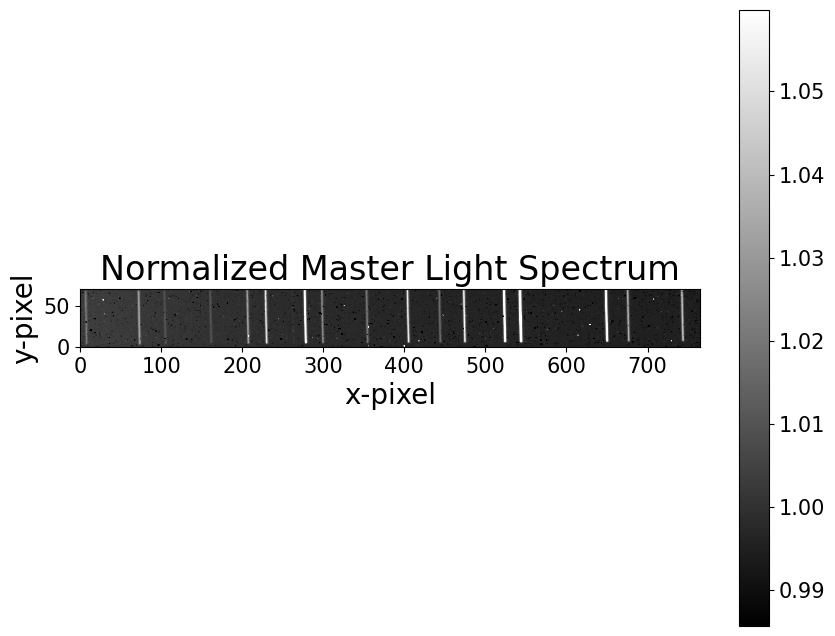

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import zoom

# Function to open and extract data from FITS files
def get_fits_data(filenames):
    data = []
    for filename in filenames:
        with fits.open(filename) as hdul:
            data.append(hdul[0].data)
    return np.array(data)

# Load cut light data
light_data = get_fits_data(cut_spec_light)

# Compute the median light field
master_light = np.median(light_data, axis=0)

# Load dark frames
dark_files = [f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_30s_visible_.0000000{i}.DARK.FIT' for i in range(10)]
dark_data = get_fits_data(dark_files)

# Compute the Master Dark
master_dark = np.median(dark_data, axis=0)

# Print shapes for debugging
print("Shape of Master Light:", master_light.shape)
print("Shape of Master Dark:", master_dark.shape)

# Check if shapes match
if master_light.shape != master_dark.shape:
    # Resize master_dark to match master_light's shape if needed
    master_dark = zoom(master_dark,
                       (master_light.shape[0] / master_dark.shape[0],
                        master_light.shape[1] / master_dark.shape[1]),
                       order=1)  # Use bilinear interpolation

# Subtract Master Dark from Master Light
final_frame = master_light - master_dark

# Normalize the resulting frame
# Normalization using mean of non-zero pixels
non_zero_pixels = final_frame[final_frame > 0]
normalization_factor = np.mean(non_zero_pixels) if non_zero_pixels.size > 0 else 1  # Prevent division by zero
normalized_master_light = final_frame / normalization_factor

# Plot the normalized master light frame
plt.figure(figsize=(10, 8))
plt.imshow(normalized_master_light, cmap='gray', origin='lower',
           vmin=np.percentile(normalized_master_light, 1),
           vmax=np.percentile(normalized_master_light, 99))

# Save the normalized master light-specrum as a FITS file
hdu = fits.PrimaryHDU(normalized_master_flat)
hdul = fits.HDUList([hdu])
output_fits_file = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/normalized_master_light_spectrum.FIT'
hdul.writeto(output_fits_file, overwrite=True)

plt.colorbar()
plt.title('Normalized Master Light Spectrum')
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show()